<a href="https://colab.research.google.com/github/Darsh1718/Darsh1718/blob/main/hiring_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predictive Hiring Analysis

Objective: Predict the likelihood of a candidate being selected and retained.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('dataset.csv')

# Check for missing values
print(df.isnull().sum())
df = pd.get_dummies(df, columns=['EducationLevel'], drop_first=False)
domain_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['DomainKnowledge'] = df['DomainKnowledge'].map(domain_map)
df['Selected'] = df['Selected'].map({'No': 0, 'Yes': 1})

# Drop CandidateID (non-predictive)
df = df.drop('CandidateID', axis=1)

CandidateID          0
ExperienceYears      0
EducationLevel       0
ScoreInAssessment    0
InterviewRating      0
DomainKnowledge      0
Selected             0
dtype: int64


Perform EDA to understand relationships between test scores and hiring.

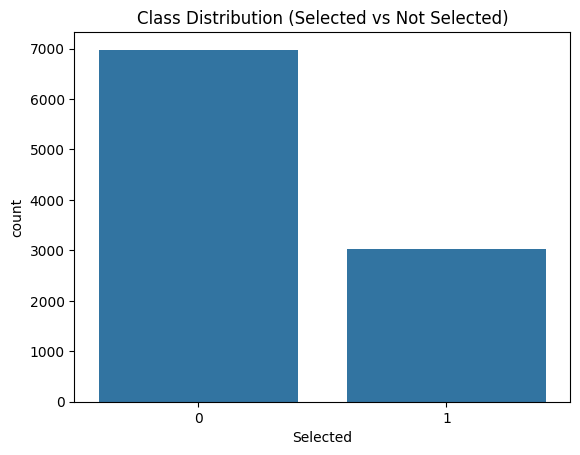

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Selected'
sns.countplot(x='Selected', data=df)
plt.title('Class Distribution (Selected vs Not Selected)')
plt.show()


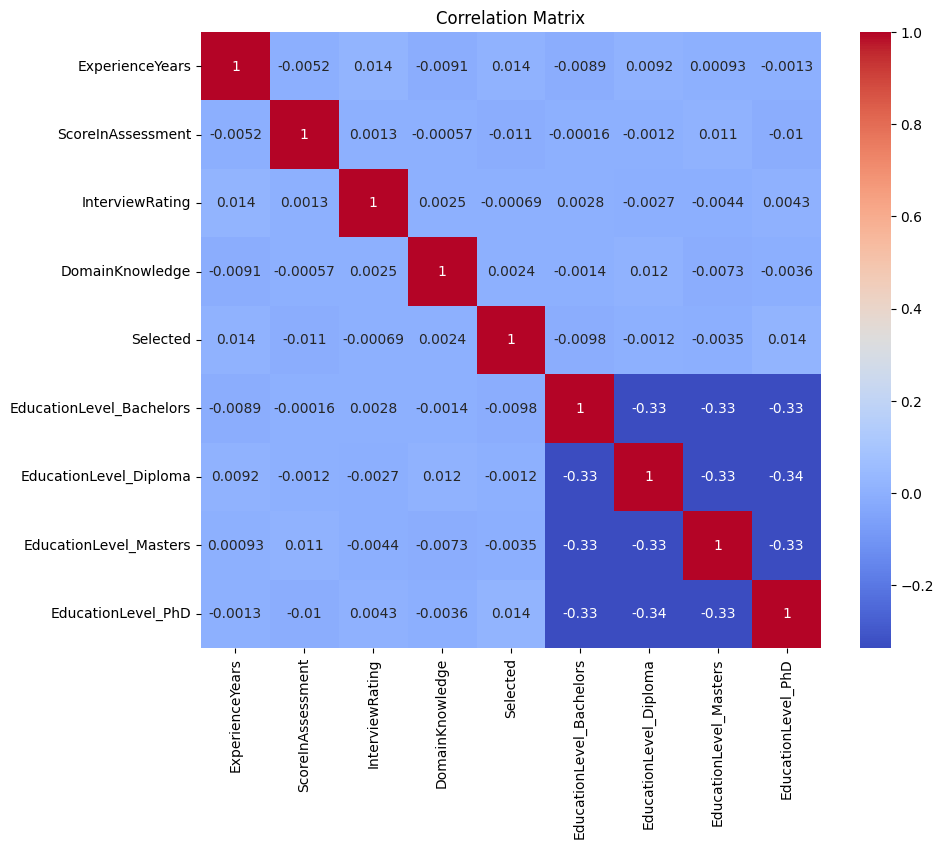

In [ ]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


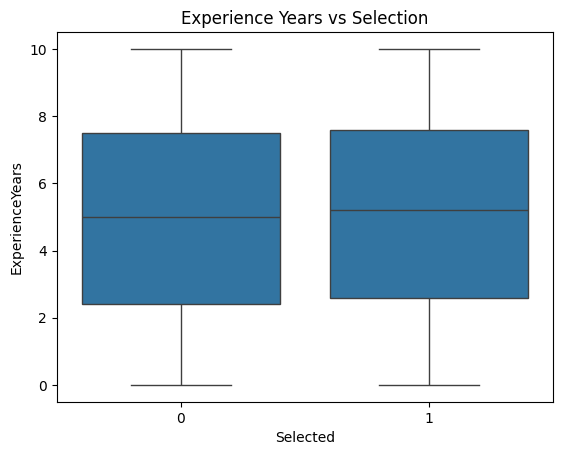

In [ ]:
# Experience vs Selection
sns.boxplot(x='Selected', y='ExperienceYears', data=df)
plt.title('Experience Years vs Selection')
plt.show()

Visualize hiring patterns by experience level and education.

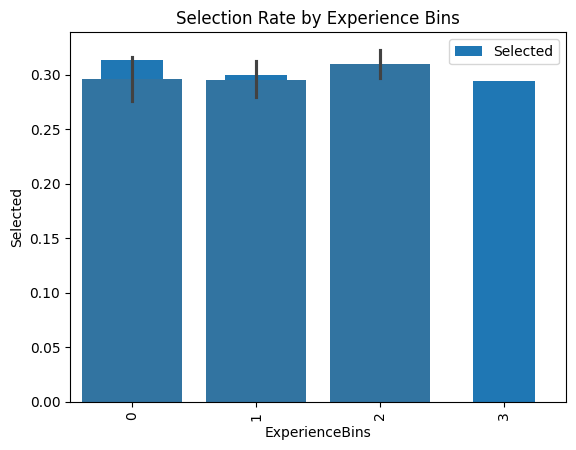

In [ ]:
# Selection by Education Level
edu_selection = df.groupby(['EducationLevel_Bachelors', 'EducationLevel_Diploma', 'EducationLevel_Masters', 'EducationLevel_PhD'])['Selected'].mean().reset_index()
edu_selection.plot(kind='bar', title='Selection Rate by Education Level')

# Selection by Experience (binned)
df['ExperienceBins'] = pd.cut(df['ExperienceYears'], bins=[0, 2, 5, 10, 20], labels=['0-2', '3-5', '6-10', '10+'])
sns.barplot(x='ExperienceBins', y='Selected', data=df)
plt.title('Selection Rate by Experience Bins')
plt.show()

Build a binary classification model (Logistic Regression or Decision Tree).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Split data
X = df.drop(['Selected', 'ExperienceBins'], axis=1)  # Drop ExperienceBins
y = df['Selected']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr = LogisticRegression(class_weight='balanced')  # Handle class imbalance
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

Evaluate model using accuracy, precision, recall, and confusion matrix.

--- Logistic Regression ---
Accuracy: 0.54
Precision: 0.32
Recall: 0.40


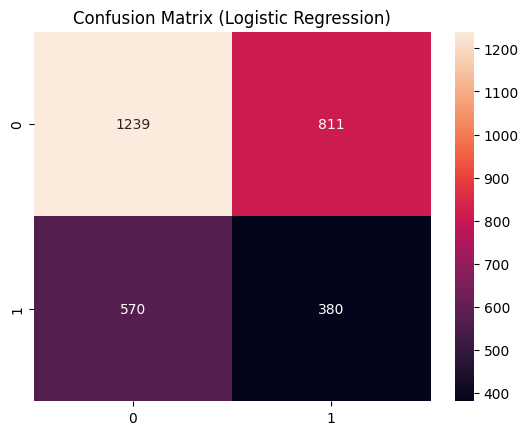

--- Decision Tree ---
Accuracy: 0.68
Precision: 0.36
Recall: 0.01


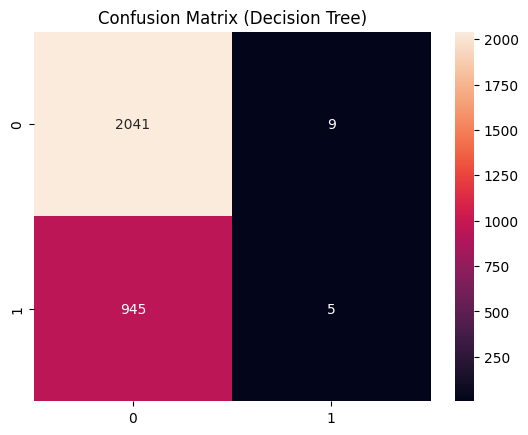

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

evaluate_model(y_test, y_pred_lr, 'Logistic Regression')
evaluate_model(y_test, y_pred_dt, 'Decision Tree')